#Sequential

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="output")
    ]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


#Predict

In [12]:
x = tf.ones((5, 4))
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [13]:
y = model(x)
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

#สร้าง sequential แบบที่สอง

In [14]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


#ปรับเปลี่ยน Network

In [16]:
model2.pop()

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.add(layers.Dense(6))

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [20]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.0027097 ,  0.05183701,  0.18949898, -0.18600297,  0.33175403,
         0.047316  ],
       [-0.0027097 ,  0.05183701,  0.18949898, -0.18600297,  0.33175403,
         0.047316  ],
       [-0.0027097 ,  0.05183701,  0.18949898, -0.18600297,  0.33175403,
         0.047316  ],
       [-0.0027097 ,  0.05183701,  0.18949898, -0.18600297,  0.33175403,
         0.047316  ],
       [-0.0027097 ,  0.05183701,  0.18949898, -0.18600297,  0.33175403,
         0.047316  ]], dtype=float32)>

#ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [21]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [22]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [23]:
train_images, test_images = train_images / 255.0, test_images / 255.0 ###แปลงค่าเป็น 0-1 เพื่อนำเข้า network

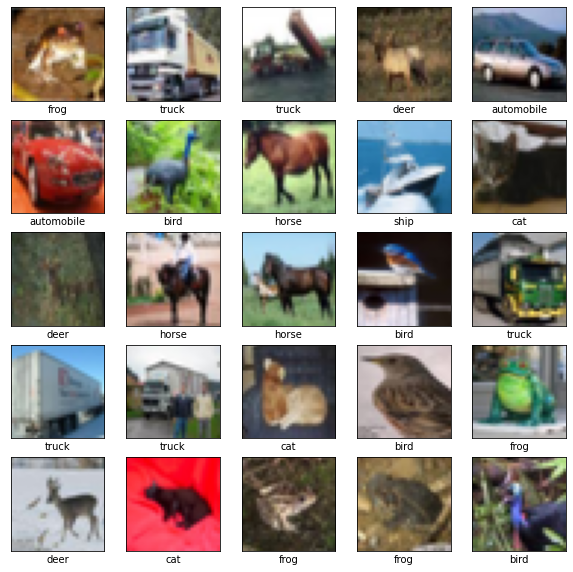

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##Define

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

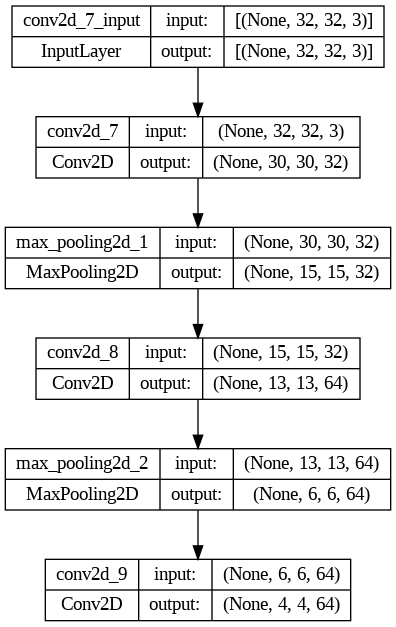

In [27]:
keras.utils.plot_model(model,show_shapes=True)

##ต่อด้วย flatten และ dense

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     

In [31]:
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5655 - accuracy: 0.4286 - val_loss: 1.3045 - val_accuracy: 0.5333
Epoch 2/2
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1986 - accuracy: 0.5745 - val_loss: 1.2304 - val_accuracy: 0.5811


<ipython-input-32-afdfbbd2af50>:6: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right')


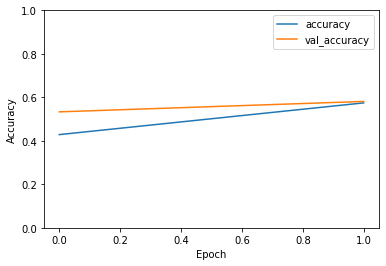

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='top right')

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 4s - loss: 1.2304 - accuracy: 0.5811 - 4s/epoch - 12ms/step


In [34]:
print(test_acc)

0.5810999870300293


#Functional

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
input_images = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) 
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [37]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [38]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

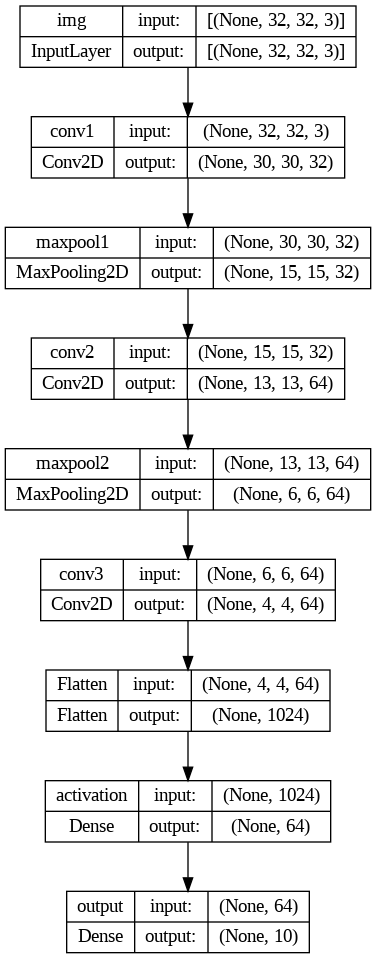

In [39]:
keras.utils.plot_model(my_model, show_shapes=True)

In [40]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
history = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
     

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5299 - accuracy: 0.4414 - val_loss: 1.3359 - val_accuracy: 0.5155
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1830 - accuracy: 0.5816 - val_loss: 1.1038 - val_accuracy: 0.6091
Epoch 3/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.0279 - accuracy: 0.6339 - val_loss: 1.0089 - val_accuracy: 0.6437
Epoch 4/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.9315 - accuracy: 0.6710 - val_loss: 0.9477 - val_accuracy: 0.6695
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8625 - accuracy: 0.6972 - val_loss: 0.9147 - val_accuracy: 0.6793
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8065 - accuracy: 0.7156 - val_loss: 0.8703 - val_accuracy: 0.6992
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7600 - accuracy: 0.7345 - val_loss: 0.8998 -

313/313 - 4s - loss: 0.8806 - accuracy: 0.7058 - 4s/epoch - 12ms/step


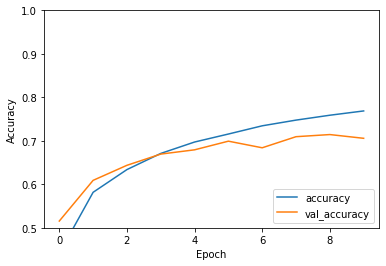

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [43]:
print(test_acc)

0.7057999968528748


#ResNet

In [44]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_11 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_10[0][0]']              
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_11[0][0]']              
                                                                                         

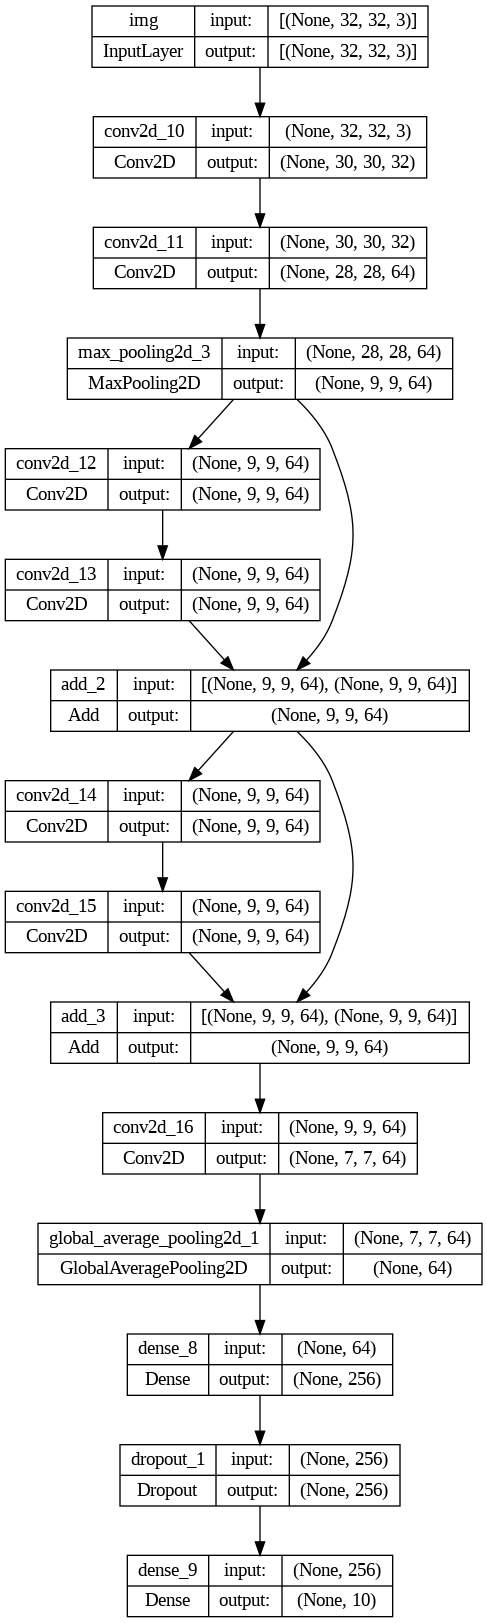

In [45]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [46]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
history = resnet_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 281s 179ms/step - loss: 1.6772 - accuracy: 0.3528 - val_loss: 1.3953 - val_accuracy: 0.4860
Epoch 2/10
1563/1563 [==============================] - 280s 179ms/step - loss: 1.2031 - accuracy: 0.5668 - val_loss: 1.0606 - val_accuracy: 0.6233
Epoch 3/10
1563/1563 [==============================] - 281s 180ms/step - loss: 0.9772 - accuracy: 0.6516 - val_loss: 0.8698 - val_accuracy: 0.6890
Epoch 4/10
1563/1563 [==============================] - 280s 179ms/step - loss: 0.8503 - accuracy: 0.6997 - val_loss: 0.8112 - val_accuracy: 0.7137
Epoch 5/10
 365/1563 [======>.......................] - ETA: 3:25 - loss: 0.7495 - accuracy: 0.7386

KeyboardInterrupt: ignored

313/313 - 4s - loss: 0.8806 - accuracy: 0.7058 - 4s/epoch - 12ms/step


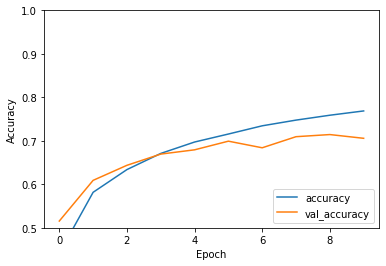

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [49]:
print(test_acc)

0.7057999968528748


#Tensorflow Data Pipeline

In [50]:
from google.colab import drive
drive.mount('/content/drive')
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
path2data = '/content/drive/MyDrive/AI/Classification Dataset-20230123T134952Z-001/Classification Dataset'

In [52]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()
     

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 198, 198, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_18 (Conv2D)             (None, 196, 196, 64  18496       ['conv2d_17[0][0]']              
                                )                                                   

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        
        path2data,
        
        target_size=(200, 200),
        batch_size=4,
        
        class_mode='categorical')

Found 30 images belonging to 2 classes.


In [54]:
from tensorflow.keras import optimizers

In [55]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7,
      epochs=50,
      verbose=1)

Epoch 1/50


<ipython-input-56-bd3860035948>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


7/7 [==============================] - 8s 990ms/step - loss: 3.3335 - accuracy: 0.6154
Epoch 2/50
7/7 [==============================] - 7s 1s/step - loss: 1.3865 - accuracy: 0.4231
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.7712 - accuracy: 0.6154
Epoch 4/50
7/7 [==============================] - 7s 997ms/step - loss: 0.7178 - accuracy: 0.5769
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 0.6926 - accuracy: 0.5714
Epoch 6/50
7/7 [==============================] - 7s 1s/step - loss: 0.7080 - accuracy: 0.6154
Epoch 7/50
7/7 [==============================] - 7s 1s/step - loss: 0.6988 - accuracy: 0.5000
Epoch 8/50
7/7 [==============================] - 7s 982ms/step - loss: 0.7130 - accuracy: 0.5000
Epoch 9/50
7/7 [==============================] - 8s 1s/step - loss: 0.6921 - accuracy: 0.5000
Epoch 10/50
7/7 [==============================] - 7s 999ms/step - loss: 0.7109 - accuracy: 0.6154
Epoch 11/50
7/7 [==============================]